# Animate the Learning Process for 1D Burgers emulation

Using APEBench's callbacks

In [88]:
import jax.numpy as jnp
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Video

import apebench

In [79]:
burgers_scenario = apebench.scenarios.difficulty.Burgers(
    num_points=60,
    # optim_config="adam;10000;constant;3e-4",
    callbacks="sample_rollout;10",  # will call the sample_rollout callback every 5 update steps
    record_loss_every=1,
)

Training now takes ~15 min instead of 1 min due to the callback overhead

In [80]:
data, net = burgers_scenario()

E: 00000, B: 00000:   0%|          | 0/10000 [00:00<?, ?it/s]

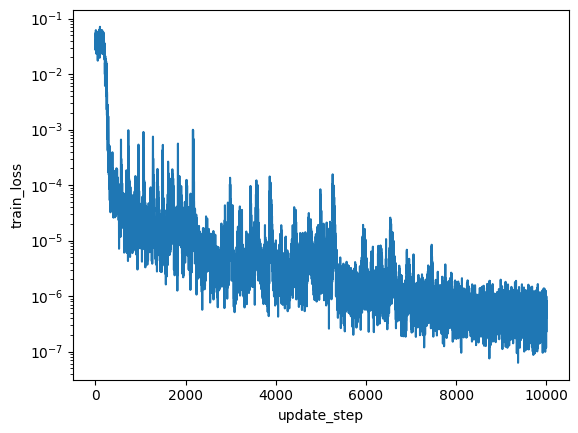

In [81]:
loss_data = apebench.melt_loss(data)
sns.lineplot(data=loss_data, x="update_step", y="train_loss")
plt.yscale("log")

In [82]:
aux_data = apebench.melt_data(data, "aux", "update_step")

aux_data

,seed,scenario,task,net,train,scenario_kwargs,update_step,aux
0,0,1d_diff_burgers,predict,Conv;34;10;relu,one,{},0,{'sample_rollout': [[[[-0.71644753 -0.70384616...
1,0,1d_diff_burgers,predict,Conv;34;10;relu,one,{},1,{'sample_rollout': None}
2,0,1d_diff_burgers,predict,Conv;34;10;relu,one,{},2,{'sample_rollout': None}
3,0,1d_diff_burgers,predict,Conv;34;10;relu,one,{},3,{'sample_rollout': None}
4,0,1d_diff_burgers,predict,Conv;34;10;relu,one,{},4,{'sample_rollout': None}
...,...,...,...,...,...,...,...,...
9995,0,1d_diff_burgers,predict,Conv;34;10;relu,one,{},9995,{'sample_rollout': None}
9996,0,1d_diff_burgers,predict,Conv;34;10;relu,one,{},9996,{'sample_rollout': None}
9997,0,1d_diff_burgers,predict,Conv;34;10;relu,one,{},9997,{'sample_rollout': None}
9998,0,1d_diff_burgers,predict,Conv;34;10;relu,one,{},9998,{'sample_rollout': None}


In [83]:
aux_data["sample_rollout"] = aux_data["aux"].apply(lambda x: x["sample_rollout"])

In [85]:
optim_trj = jnp.concatenate(list(aux_data.iloc[::10]["sample_rollout"].values))

optim_trj.shape

(1000, 201, 1, 60)

In [86]:
ani = apebench.exponax.viz.animate_spatio_temporal(optim_trj)

In [87]:
ani.save("burgers_optim_rollout.mp4")

In [89]:
Video(
    url="https://github.com/Ceyron/Ceyron/assets/27728103/70a5a9a7-efac-44d1-92b8-290e75fb0396"
)